# Week 4 Tutorial

### Setup

In [5]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [9]:
def show_img(window_name, img):
    cv.imshow(window_name, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Exercise 1

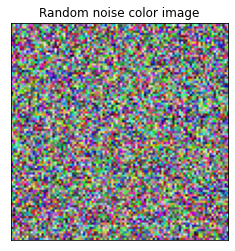

In [6]:
# Q1: create random noise color image
h = 100
w = 100
noise_color_img = np.random.randint(0, 256, (h, w, 3), dtype=np.uint8)

plt.imshow(noise_color_img)
plt.title("Random noise color image")
plt.xticks([]), plt.yticks([])

plt.show()

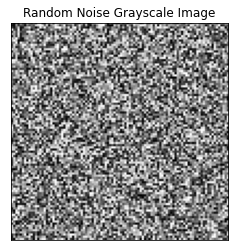

In [7]:
#Q2
grayscale_image = np.random.randint(0, 256, (h, w), dtype=np.uint8)

plt.imshow(grayscale_image, cmap='gray')
plt.title('Random Noise Grayscale Image')
plt.xticks([]), plt.yticks([])
plt.show()

### Exercise 2

In [10]:
img = cv.imread("images/dog.jfif")

def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    img_copy = img.copy()
    
    h, w = img.shape[:2]
    n_vertical_grids = 3
    n_horizontal_grids = 3

    # row sizes and column sizes
    M = int(h / n_vertical_grids)
    N = int(w / n_horizontal_grids)

    tiles = []
    
    for y in range(0, h, M):
        for x in range(0, w, N):
            x1 = x+N
            y1 = y+M
        
            if x1 > w and y1 > h:
                x1 = w-1
                y1 = h-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:w]
                tiles.append(tile)
        
            elif y1 > h:
                y1 = h-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w-1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)

    show_img("crop",img_copy)
    
crop_grid(img, 3, 3, (255, 0, 0))

### Exercise 3

In [11]:
def smooth_transition_images(img, img2, alpha):
    return cv.addWeighted(img, alpha, img2, 1 - alpha, 0)

img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

alpha = 0.6
h, w = img.shape[:2]
img2 = cv.resize(img2, (w, h))

# Define the number of steps and generate image sequences
num_steps = 20
alpha_values = np.linspace(0, 1, num_steps)

# Create and save the image sequences
for i, alpha in enumerate(alpha_values):
    blended_image = smooth_transition_images(img, img2, alpha)
    cv.imshow("Smooth Transition", blended_image)
    cv.waitKey(200)  # Adjust the time (in milliseconds) between each frame
    
cv.destroyAllWindows()

### Exercise 4

In [12]:
from PIL import Image, ImageDraw, ImageFont

def add_watermark(image_path, watermark_text, output_path):
    # Open the original image
    image = Image.open(image_path)

    # Create a copy of the image to apply the watermark
    watermarked_image = image.copy()

    # Set the watermark text font and size
    font = ImageFont.truetype("arial.ttf", 130)

    # Calculate the position to place the watermark (bottom left corner)
    text_width, text_height = font.getsize(watermark_text)
    margin = 200 # set the margin from the bottom and left edges
    x = margin
    y = image.height - text_height - margin

    # Create a drawing context for the watermark
    draw = ImageDraw.Draw(watermarked_image)

    # Draw the watermark text on the image
    draw.text((x, y), watermark_text, font=font)

    # Save the watermarked image
    watermarked_image.save(output_path)

    print("Watermark applied successfully.")


# Add the watermark
add_watermark("images/travel_hd.jpg", "Aijiaa", "images/travel_hd_watermarked.jpg")

Watermark applied successfully.
